# Fashion MNIST - CNN
* 32 Conv2D layer
* 64 Conv2D layer
* MaxPooling layer
* Dropout(0.25)
* Flatten
* Fully Connected Network(512) layer
* Dropout(0.5)
* Output layer

### 1. 필요한 모듈 불러오기 및 데이터 로딩/확인

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

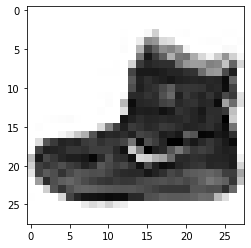

In [ ]:
plt.imshow(X_train[0], cmap='Greys');

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

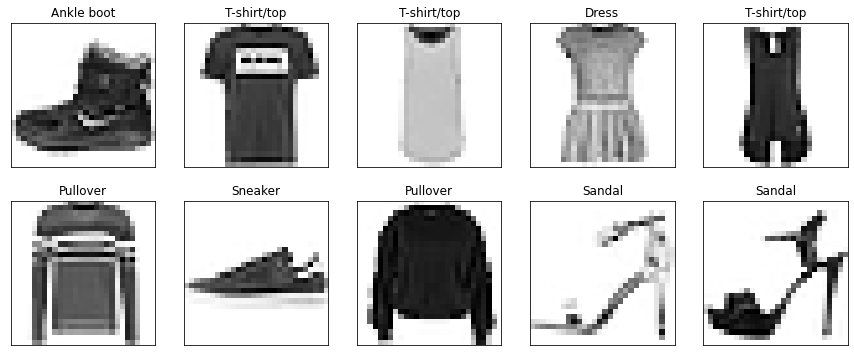

In [ ]:
plt.figure(figsize = (15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

### 2. 데이터 전처리

In [ ]:
# X data : 데이터 정규화, 3차원을 4차원으로 변경(2차원 이미지 데이터를 3차원 이미지 데이터로 변경)

X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255

In [ ]:
# Y data : One-Hot-encoding

from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

### 3. 모델 정의, 설정, 학습, 평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(64, activation = 'relu'),
                    Dropout(0.33),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_22 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               4719104   
                                                      

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = 'best-fashion-mnist.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
early_stop = EarlyStopping(patience = 10)

In [ ]:
hist = model.fit(X_train, Y_train, batch_size = 200, epochs = 100, 
                 verbose = 0, validation_split = 0.2, callbacks = [checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 0.35000, saving model to best-fashion-mnist.h5

Epoch 00002: val_loss improved from 0.35000 to 0.28797, saving model to best-fashion-mnist.h5

Epoch 00003: val_loss improved from 0.28797 to 0.24289, saving model to best-fashion-mnist.h5

Epoch 00004: val_loss improved from 0.24289 to 0.23265, saving model to best-fashion-mnist.h5

Epoch 00005: val_loss improved from 0.23265 to 0.22679, saving model to best-fashion-mnist.h5

Epoch 00006: val_loss improved from 0.22679 to 0.21660, saving model to best-fashion-mnist.h5

Epoch 00007: val_loss improved from 0.21660 to 0.20680, saving model to best-fashion-mnist.h5

Epoch 00008: val_loss did not improve from 0.20680

Epoch 00009: val_loss improved from 0.20680 to 0.19618, saving model to best-fashion-mnist.h5

Epoch 00010: val_loss did not improve from 0.19618

Epoch 00011: val_loss did not improve from 0.19618

Epoch 00012: val_loss did not improve from 0.19618

Epoch 00013: val_loss did not impro

In [ ]:
best_model = load_model(model_path)
result = best_model.evaluate(X_test, Y_test, verbose= 0)
f_mnist_acc = round(result[0], 4)
f_mnist_vloss = round(result[1], 4)

print(f_mnist_acc, f_mnist_vloss)

0.2213 0.9211


### 4. 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

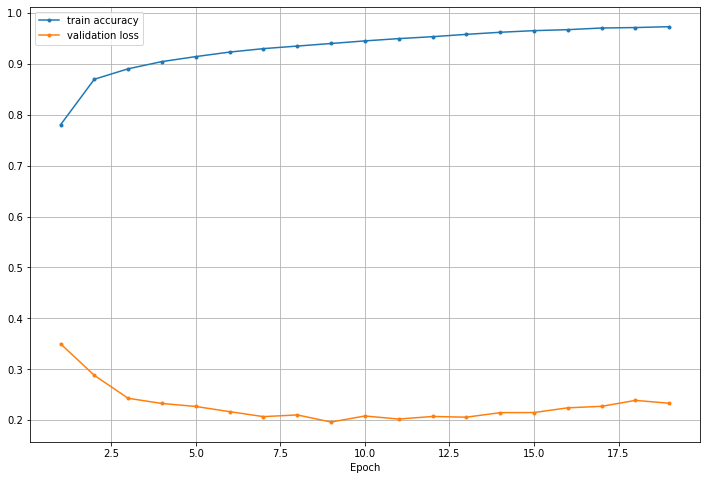

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, 'o-', ms = 3, label = 'train accuracy')
plt.plot(xs, y_vloss, 'o-', ms = 3, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

### 5. 다른 모델 학습

In [ ]:
model2 = Sequential([
                    Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(256, activation = 'relu'),
                    Dropout(0.33),
                    Dense(128, activation = 'relu'),
                    Dropout(0.33),
                    Dense(64, activation = 'relu'),
                    Dropout(0.33),
                    Dense(10, activation = 'softmax')
])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_25 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               4719104   
                                                      

In [ ]:
model_path = 'best-fashion-mnist2.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
early_stop = EarlyStopping(patience = 10)

In [ ]:
model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(X_train, Y_train, batch_size = 200, epochs = 100, 
                 verbose = 0, validation_split = 0.2, callbacks = [checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 0.40284, saving model to best-fashion-mnist2.h5

Epoch 00002: val_loss improved from 0.40284 to 0.30751, saving model to best-fashion-mnist2.h5

Epoch 00003: val_loss improved from 0.30751 to 0.27442, saving model to best-fashion-mnist2.h5

Epoch 00004: val_loss improved from 0.27442 to 0.24206, saving model to best-fashion-mnist2.h5

Epoch 00005: val_loss improved from 0.24206 to 0.23545, saving model to best-fashion-mnist2.h5

Epoch 00006: val_loss improved from 0.23545 to 0.22938, saving model to best-fashion-mnist2.h5

Epoch 00007: val_loss improved from 0.22938 to 0.21569, saving model to best-fashion-mnist2.h5

Epoch 00008: val_loss improved from 0.21569 to 0.21522, saving model to best-fashion-mnist2.h5

Epoch 00009: val_loss improved from 0.21522 to 0.21470, saving model to best-fashion-mnist2.h5

Epoch 00010: val_loss did not improve from 0.21470

Epoch 00011: val_loss improved from 0.21470 to 0.21127, saving model to best-fashion-mn

In [ ]:
best_model = load_model(model_path)
result2 = best_model.evaluate(X_test, Y_test, verbose = 0)
f_mnist_acc2 = round(result2[0], 4)
f_mnist_vloss2 = round(result2[1], 4)

print(f_mnist_acc2, f_mnist_vloss2)

0.2348 0.923
